## KNN으로 iris 이진 분류(Binary Classification)
___

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. 데이터 준비

In [4]:
iris = pd.read_csv("../data/iris.csv")
print(iris.shape, "\n\n")
iris.head()

(150, 6) 




,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df = iris.drop(["Id"], axis=1).copy()
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [9]:
## Label Encoding
df["species"] = df["species"].map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
# x_data = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
# x_data = df.iloc[:, :-1]
x_data = df.drop(["species"], axis=1)
x_data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
# y_data = df["species"]
y_data = df.iloc[:, -1]
y_data

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [13]:
x_data.shape, y_data.shape   # y_data.shape이 (150, 1)이면 잘못된 것일 확률이 있음

((150, 4), (150,))

#### 2. 데이터 분리

In [16]:
# !pip install scikit-learn --user

     ---------------------------------------- 8.2/8.2 MB 10.3 MB/s eta 0:00:00
     ---------------------------------------- 39.8/39.8 MB 6.1 MB/s eta 0:00:00
     ------------------------------------- 298.0/298.0 kB 18.0 MB/s eta 0:00:00


In [14]:
import sklearn

In [15]:
x_data, y_data = sklearn.utils.shuffle(x_data, y_data)   # 랜덤으로 셔플

# 8:2 비율로 데이터 분리
print(x_data.shape, y_data.shape)
x_train = x_data.iloc[:120]
x_test = x_data.iloc[120:]
y_train = y_data.iloc[:120]
y_test = y_data.iloc[120:]
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(150, 4) (150,)
(120, 4) (30, 4) (120,) (30,)


#### 3. 정규화
* 최소-최대 정규화
* 표준화(학습 데이터와 테스트 데이터를 분리하고 각각 표준화를 진행)

In [51]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
131,7.9,3.8,6.4,2.0
93,5.0,2.3,3.3,1.0
84,5.4,3.0,4.5,1.5
61,5.9,3.0,4.2,1.5
139,6.9,3.1,5.4,2.1
...,...,...,...,...
120,6.9,3.2,5.7,2.3
108,6.7,2.5,5.8,1.8
86,6.7,3.1,4.7,1.5
116,6.5,3.0,5.5,1.8


In [16]:
# 표준화 과정
"""
sepal_length_mu = x_train["sepal_length"].mean()
sepal_length_std = x_train["sepal_length"].std()
x_train["sepal_length"] = (x_train["sepal_length"] - sepal_length_mu) / sepal_length_std

sepal_width_mu = x_train["sepal_width"].mean()
sepal_width_std = x_train["sepal_width"].std()
x_train["sepal_width"] = (x_train["sepal_width"] - sepal_width_mu) / sepal_width_std

petal_length_mu = x_train["petal_length"].mean()
petal_length_std = x_train["petal_length"].std()
x_train["petal_length"] = (x_train["petal_length"] - petal_length_mu) / petal_length_std

petal_width_mu = x_train["petal_width"].mean()
petal_width_std = x_train["petal_width"].std()
x_train["petal_width"] = (x_train["petal_width"] - petal_width_mu) / petal_width_std

x_train
"""


for col in x_train.columns:
    mu = x_train[col].mean()
    std = x_train[col].std()
    x_train[col] = (x_train[col] - mu) / std

C:\Users\021\AppData\Local\Temp\ipykernel_1252\2198136611.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = (x_train[col] - mu) / std


In [17]:
# DataFrame 타입을 Numpy 타입으로 변환
print(type(x_train), type(y_train))
x_train = x_train.values
y_train = y_train.values
print(type(x_train), type(y_train))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


#### 데이터 전처리 함수(위 과정을 함수화)

In [19]:
def get_iris():
    iris = pd.read_csv("../data/iris.csv")
    df = iris.drop(["Id"], axis=1).copy()
    df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
    df["species"] = df["species"].map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})   # Label Encoding
    
    # 데이터 분리
    x_data = df.iloc[:, :-1]
    y_data = df.iloc[:, -1]
    
    x_data, y_data = sklearn.utils.shuffle(x_data, y_data)   # 랜덤으로 셔플

    # 8:2 비율로 데이터 분리
    print(x_data.shape, y_data.shape)
    x_train = x_data.iloc[:120]
    x_test = x_data.iloc[120:]
    y_train = y_data.iloc[:120]
    y_test = y_data.iloc[120:]
    print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
    
    for col in x_train.columns:
        mu = x_train[col].mean()
        std = x_train[col].std()
        x_train[col] = (x_train[col] - mu) / std
        x_test[col] = (x_test[col] - mu) / std
    
    return x_train, x_test, y_train, y_test
    

In [20]:
x_train, x_test, y_train, y_test = get_iris()
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(150, 4) (150,)
(120, 4) (30, 4) (120,) (30,)
(120, 4) (30, 4) (120,) (30,)


C:\Users\021\AppData\Local\Temp\ipykernel_1252\819118655.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = (x_train[col] - mu) / std
C:\Users\021\AppData\Local\Temp\ipykernel_1252\819118655.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = (x_test[col] - mu) / std


#### 이진 데이터로 데이터 준비

In [29]:
def get_iris_binary():
    iris = pd.read_csv("../data/iris.csv")
    iris = iris.loc[iris["Species"] != "Iris-virginica"]
    df = iris.drop(["Id"], axis=1).copy()
    df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
    df["species"] = df["species"].map({"Iris-setosa": 0, "Iris-versicolor": 1})   # Label Encoding
    
    # 데이터 분리
    x_data = df.iloc[:, :-1]
    y_data = df.iloc[:, -1]
    
    x_data, y_data = sklearn.utils.shuffle(x_data, y_data)   # 랜덤으로 셔플

    # 8:2 비율로 데이터 분리
    num = int(len(x_data) * 0.8)
    print(x_data.shape, y_data.shape)
    x_train = x_data.iloc[:num]
    x_test = x_data.iloc[num:]
    y_train = y_data.iloc[:num]
    y_test = y_data.iloc[num:]
    print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
    
    for col in x_train.columns:
        mu = x_train[col].mean()
        std = x_train[col].std()
        x_train[col] = (x_train[col] - mu) / std
        x_test[col] = (x_test[col] - mu) / std
    
    
    return x_train, x_test, y_train, y_test
    

In [30]:
x_train, x_test, y_train, y_test = get_iris_binary()

(100, 4) (100,)
(80, 4) (20, 4) (80,) (20,)


C:\Users\021\AppData\Local\Temp\ipykernel_1252\2489749180.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = (x_train[col] - mu) / std
C:\Users\021\AppData\Local\Temp\ipykernel_1252\2489749180.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[col] = (x_test[col] - mu) / std


In [31]:
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

#### 4. 학습

In [21]:
from sklearn.neighbors import KNeighborsClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [32]:
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
clf.score(x_train, y_train)   # 학습 데이터의 평가

1.0

#### 5. 평가

In [33]:
clf.score(x_test, y_test)   # 1.0이면 100%라는 의미

1.0

#### 6. 예측

In [34]:
y_pred = clf.predict(x_test)
print("y_pred :", y_pred)
print("y_test :", y_test)
tmp1 = (y_pred == y_test).sum()
tmp2 = len(y_pred)
print("score :", tmp1 / tmp2)

y_pred : [1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1]
y_test : [1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1]
score : 1.0


#### 평가지표(metrics)

In [35]:
from sklearn.metrics import accuracy_score   # 정확도
from sklearn.metrics import precision_score   # 정밀도
from sklearn.metrics import recall_score   # 재현율

def print_score(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    print("accuracy :", acc)
    print("precision :", pre)
    print("recall :", rec)

In [36]:
print_score(y_test, y_pred)

accuracy : 1.0
precision : 1.0
recall : 1.0


#### 혼동 행렬(Confusion Matrix)

In [37]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
cfm

array([[12,  0],
       [ 0,  8]], dtype=int64)

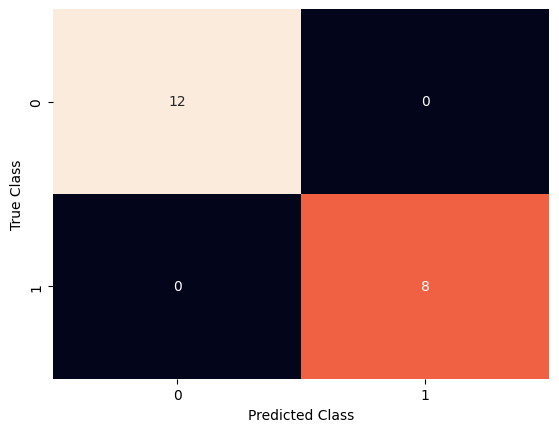

In [38]:
# 히트맵으로 시각화
sns.heatmap(cfm, annot=True, cbar=False)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()